In [18]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
#Import Data
chicago_df = pd.read_excel("Resources/chicago_case_schiller.xlsx")
national_df = pd.read_excel("Resources/national_case_schiller.xlsx")
interest_df = pd.read_excel("Resources/Mortgage_Rate_National.xlsx")
cookunemployment = pd.read_excel("Resources/Cook_County_Unemployment.xlsx")
nationalunemployment = pd.read_excel("Resources/National_unemployment.xlsx")

#Clean and merge data together
interest_df['Year'] = pd.DatetimeIndex(interest_df['Date']).year
interest_df['Month'] = pd.DatetimeIndex(interest_df['Date']).month
interest_df = interest_df[["Date", "Year", "Month", "Mortgage Interest Rate"]]
interest_df = interest_df.groupby(['Year','Month']).mean()

house_price_index = chicago_df.merge(national_df, how='inner', on='Date')
house_price_index['Year'] = pd.DatetimeIndex(house_price_index['Date']).year
house_price_index['Month'] = pd.DatetimeIndex(house_price_index['Date']).month
house_price_index = house_price_index[["Date","Month", "Year", "Chicago Home Price Index", "National Home Price Index"]]

unemployment= cookunemployment.merge(nationalunemployment, how='inner', on='Date')
unemployment['Year'] = pd.DatetimeIndex(unemployment['Date']).year
unemployment['Month'] = pd.DatetimeIndex(unemployment['Date']).month
unemployment = unemployment[["Date","Month", "Year", "National Unemployment Rate", "Cook County Unemployment Rate"]]

priceunemploymentdf = house_price_index.merge(unemployment, how='inner', on=['Date', 'Month', 'Year'])

priceunemploymentdf = priceunemploymentdf[["Year", "Month", "Chicago Home Price Index", "National Home Price Index", "National Unemployment Rate", "Cook County Unemployment Rate"]]

df = priceunemploymentdf.merge(interest_df, how='inner', on=['Year', 'Month'])

In [3]:
df

,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
0,1990,1,69.355887,76.897,5.4,7.6,9.8950
1,1990,2,68.700554,77.053,5.3,7.2,10.1975
2,1990,3,68.904077,77.200,5.2,7.0,10.2680
3,1990,4,69.475721,77.277,5.4,7.4,10.3700
4,1990,5,69.995388,77.297,5.4,7.0,10.4775
...,...,...,...,...,...,...,...
371,2020,12,155.457127,235.568,6.7,9.4,2.6840
372,2021,1,156.633251,238.555,6.3,9.8,2.7350
373,2021,2,157.326126,241.624,6.2,9.5,2.8100
374,2021,3,158.730817,245.303,6.0,8.4,3.0825


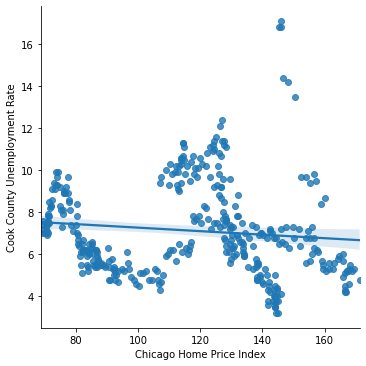

In [15]:
sns.lmplot(x="Chicago Home Price Index", y="Cook County Unemployment Rate", data=df);

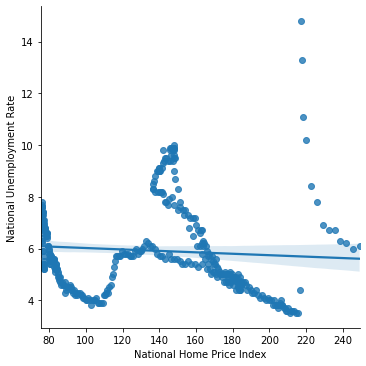

In [16]:
sns.lmplot(x="National Home Price Index", y="National Unemployment Rate", data=df);

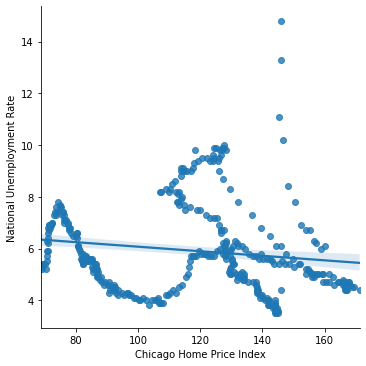

In [17]:
sns.lmplot(x="Chicago Home Price Index", y="National Unemployment Rate", data=df);

In [19]:
stats.pearsonr(df['Chicago Home Price Index'], df['Cook County Unemployment Rate'])

(-0.10650943703805023, 0.03898991161956367)

In [20]:
stats.pearsonr(df['National Home Price Index'], df['National Unemployment Rate'])

(-0.07417650796664768, 0.15113753260093313)

In [21]:
stats.pearsonr(df['Chicago Home Price Index'], df['National Unemployment Rate'])

(-0.1457893855243434, 0.004615694040342979)

In [7]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

df.corr(method=histogram_intersection)

,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
Year,1.0,2428.0,44196.2,51576.4,2224.9,2678.3,2269.3
Month,2428.0,1.0,2428.0,2428.0,1707.6,1874.1,1722.5
Chicago Home Price Index,44196.2,2428.0,1.0,44072.6,2224.9,2678.3,2269.3
National Home Price Index,51576.4,2428.0,44072.6,1.0,2224.9,2678.3,2269.3
National Unemployment Rate,2224.9,1707.6,2224.9,2224.9,1.0,2221.3,1828.5
Cook County Unemployment Rate,2678.3,1874.1,2678.3,2678.3,2221.3,1.0,1996.3
Mortgage Interest Rate,2269.3,1722.5,2269.3,2269.3,1828.5,1996.3,1.0


In [8]:
df.corr(method='pearson')

,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
Year,1.000000,-0.021520,0.773711,0.928780,0.045534,0.081820,-0.944087
Month,-0.021520,1.000000,0.009882,0.003619,-0.005730,-0.100161,-0.013691
Chicago Home Price Index,0.773711,0.009882,1.000000,0.914892,-0.145789,-0.106509,-0.687960
National Home Price Index,0.928780,0.003619,0.914892,1.000000,-0.074177,-0.022523,-0.832606
National Unemployment Rate,0.045534,-0.005730,-0.145789,-0.074177,1.000000,0.945789,-0.188562
Cook County Unemployment Rate,0.081820,-0.100161,-0.106509,-0.022523,0.945789,1.000000,-0.220208
Mortgage Interest Rate,-0.944087,-0.013691,-0.687960,-0.832606,-0.188562,-0.220208,1.000000


In [9]:
df.corr(method='kendall')

,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
Year,1.000000,-0.014896,0.652171,0.810636,-0.110555,-0.049740,-0.790596
Month,-0.014896,1.000000,0.012014,0.009440,0.003842,-0.080774,-0.007369
Chicago Home Price Index,0.652171,0.012014,1.000000,0.816255,-0.218441,-0.178231,-0.470218
National Home Price Index,0.810636,0.009440,0.816255,1.000000,-0.251633,-0.197315,-0.624668
National Unemployment Rate,-0.110555,0.003842,-0.218441,-0.251633,1.000000,0.817725,-0.058763
Cook County Unemployment Rate,-0.049740,-0.080774,-0.178231,-0.197315,0.817725,1.000000,-0.092900
Mortgage Interest Rate,-0.790596,-0.007369,-0.470218,-0.624668,-0.058763,-0.092900,1.000000


In [10]:
df.corr(method='spearman')

,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
Year,1.000000,-0.021134,0.763383,0.923017,-0.092732,-0.033971,-0.941534
Month,-0.021134,1.000000,0.011962,0.006590,0.006179,-0.113334,-0.007423
Chicago Home Price Index,0.763383,0.011962,1.000000,0.931022,-0.282929,-0.236132,-0.671291
National Home Price Index,0.923017,0.006590,0.931022,1.000000,-0.284952,-0.229694,-0.822793
National Unemployment Rate,-0.092732,0.006179,-0.282929,-0.284952,1.000000,0.946855,-0.088238
Cook County Unemployment Rate,-0.033971,-0.113334,-0.236132,-0.229694,0.946855,1.000000,-0.146099
Mortgage Interest Rate,-0.941534,-0.007423,-0.671291,-0.822793,-0.088238,-0.146099,1.000000


In [23]:
unemp_df = df[df["Year"] >= 2008]
unemp_df

,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
216,2008,1,157.528500,173.133,5.0,6.2,5.7580
217,2008,2,155.969158,171.542,4.9,6.0,5.9175
218,2008,3,155.244400,170.054,5.1,5.7,5.9700
219,2008,4,153.931433,168.338,5.0,5.6,5.9175
220,2008,5,152.008448,166.659,5.4,6.4,6.0360
...,...,...,...,...,...,...,...
371,2020,12,155.457127,235.568,6.7,9.4,2.6840
372,2021,1,156.633251,238.555,6.3,9.8,2.7350
373,2021,2,157.326126,241.624,6.2,9.5,2.8100
374,2021,3,158.730817,245.303,6.0,8.4,3.0825


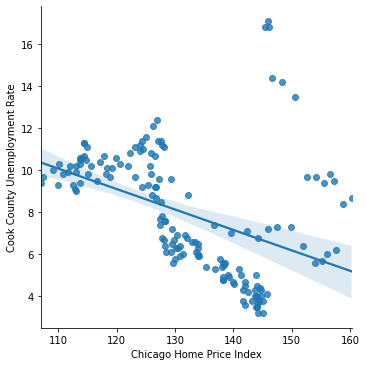

In [24]:
sns.lmplot(x="Chicago Home Price Index", y="Cook County Unemployment Rate", data=unemp_df);

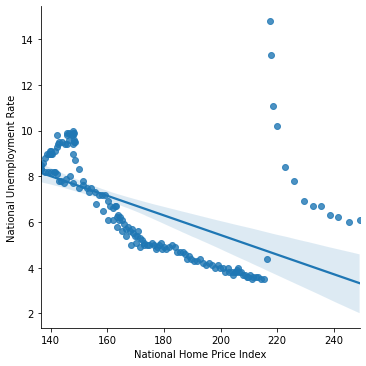

In [25]:
sns.lmplot(x="National Home Price Index", y="National Unemployment Rate", data=unemp_df);

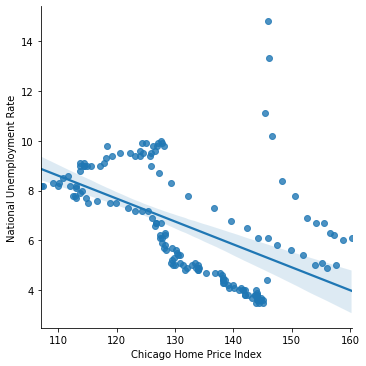

In [26]:
sns.lmplot(x="Chicago Home Price Index", y="National Unemployment Rate", data=unemp_df);

In [27]:
stats.pearsonr(unemp_df['Chicago Home Price Index'], unemp_df['Cook County Unemployment Rate'])

(-0.42735762861725607, 1.7402563052393428e-08)

In [28]:
stats.pearsonr(unemp_df['National Home Price Index'], unemp_df['National Unemployment Rate'])

(-0.5473139286168214, 6.953837263049618e-14)

In [29]:
stats.pearsonr(unemp_df['Chicago Home Price Index'], unemp_df['National Unemployment Rate'])

(-0.5241503420404794, 1.1347006717680016e-12)

In [30]:
unemp_df.corr(method=histogram_intersection)

,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
Year,1.0,1024.0,21152.9,27802.2,1049.4,1267.1,673.0
Month,1024.0,1.0,1024.0,1024.0,761.8,825.6,572.3
Chicago Home Price Index,21152.9,1024.0,1.0,21152.9,1049.4,1267.1,673.0
National Home Price Index,27802.2,1024.0,21152.9,1.0,1049.4,1267.1,673.0
National Unemployment Rate,1049.4,761.8,1049.4,1049.4,1.0,1047.5,656.1
Cook County Unemployment Rate,1267.1,825.6,1267.1,1267.1,1047.5,1.0,664.6
Mortgage Interest Rate,673.0,572.3,673.0,673.0,656.1,664.6,1.0


In [31]:
unemp_df.corr(method='pearson')

,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
Year,1.000000,-0.051051,0.535721,0.886667,-0.522882,-0.379815,-0.709292
Month,-0.051051,1.000000,-0.047826,-0.018991,0.004131,-0.054363,-0.044149
Chicago Home Price Index,0.535721,-0.047826,1.000000,0.854273,-0.524150,-0.427358,0.018144
National Home Price Index,0.886667,-0.018991,0.854273,1.000000,-0.547314,-0.410699,-0.437302
National Unemployment Rate,-0.522882,0.004131,-0.524150,-0.547314,1.000000,0.952733,0.088991
Cook County Unemployment Rate,-0.379815,-0.054363,-0.427358,-0.410699,0.952733,1.000000,-0.054294
Mortgage Interest Rate,-0.709292,-0.044149,0.018144,-0.437302,0.088991,-0.054294,1.000000


In [32]:
unemp_df.corr(method='kendall')

,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
Year,1.000000,-0.035273,0.520015,0.711052,-0.577968,-0.462160,-0.504663
Month,-0.035273,1.000000,-0.025540,-0.001965,0.009494,-0.039320,-0.031933
Chicago Home Price Index,0.520015,-0.025540,1.000000,0.791981,-0.477363,-0.437735,-0.082252
National Home Price Index,0.711052,-0.001965,0.791981,1.000000,-0.634343,-0.562870,-0.269089
National Unemployment Rate,-0.577968,0.009494,-0.477363,-0.634343,1.000000,0.857478,0.126486
Cook County Unemployment Rate,-0.462160,-0.039320,-0.437735,-0.562870,0.857478,1.000000,0.058552
Mortgage Interest Rate,-0.504663,-0.031933,-0.082252,-0.269089,0.126486,0.058552,1.000000


In [33]:
unemp_df.corr(method='spearman')

,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
Year,1.000000,-0.049056,0.569023,0.855439,-0.614973,-0.514371,-0.654723
Month,-0.049056,1.000000,-0.039620,-0.016142,0.017652,-0.050305,-0.042011
Chicago Home Price Index,0.569023,-0.039620,1.000000,0.891981,-0.609112,-0.558365,-0.103632
National Home Price Index,0.855439,-0.016142,0.891981,1.000000,-0.704534,-0.627889,-0.393247
National Unemployment Rate,-0.614973,0.017652,-0.609112,-0.704534,1.000000,0.967825,0.181882
Cook County Unemployment Rate,-0.514371,-0.050305,-0.558365,-0.627889,0.967825,1.000000,0.085732
Mortgage Interest Rate,-0.654723,-0.042011,-0.103632,-0.393247,0.181882,0.085732,1.000000
